In [6]:
import pandas as pd
import numpy as np



# Features 

* Price: The price of the house.

* Area: The total area of the house in square feet.

* Bedrooms: The number of bedrooms in the house.

* Bathrooms: The number of bathrooms in the house.

* Stories: The number of stories in the house.

* Mainroad: Whether the house is connected to the main road (Yes/No).

* Guestroom: Whether the house has a guest room (Yes/No).

* Basement: Whether the house has a basement (Yes/No).

* Hot water heating: Whether the house has a hot water heating system (Yes/No).

* Airconditioning: Whether the house has an air conditioning system (Yes/No).

* Parking: The number of parking spaces available within the house.

* Prefarea: Whether the house is located in a preferred area (Yes/No).

* Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

* House Age: the house age

# 1 Exploration des données (EDA)

## 1.1 Importation des données

In [7]:
df = pd.read_csv('c:/Users/houss/Desktop/folder/projet-ds/data/house_prices.csv')
# pd.read_csv('data/house_prices.csv')
df.head()


,price,AreA,bedrooms,BATHROOMS,stories,mainroad,guestroom,basement,hotwaterheating,air conditioning,parking,prefarea,furnishing STATUS,houSeaGe
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,FURNISHED,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,FURNISHED,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished,NaN


## 1.2 Nettoyage des données

### 1.2.1 Formatage des données

In [8]:
def formatage_donnee(data):
    """
    Description
    Cette fonction change le nommage des colonnes (minuscule,
    sans espace, lié avec underscore). Rendre unique des valeurs écrites différemment.
    
    Parameters
    ----------
    data: A DataFrame
    Returns: 
    ----------
    A cleaned DataFrame
    """
    # Writing the columns names in lowercase, and replacing any space in the names with _
    data = data.rename(columns=lambda x: x.lower().replace(' ', '_'))
    
    # Making unique values that have been written diffrentely 
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].str.lower()
    
            
    return data   

df = formatage_donnee(df)             

### 1.2.2 Valeurs manquantes


In [9]:
# Since missing values depend on the data we have to chekc how many data are missing in each columns, then decide.
df.isnull().sum(axis = 0)    

price                 20
area                  15
bedrooms              24
bathrooms             21
stories               15
mainroad              16
guestroom             23
basement              22
hotwaterheating       18
air_conditioning      15
parking               16
prefarea              14
furnishing_status     23
houseage             804
dtype: int64

In [10]:
# We notice that houseage column has 804 missing value out of 806, so we remove this column
df = df.drop('houseage', axis=1)

In [11]:
# For the missing values, we can replace the missing values with the most frequent value in each column for example, or 
# take the mean for float colums, or be pessimistic and put the worst possible value!
# The better approach is replace them once we visualte the data

## 1.3 Visualisation des données

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,air_conditioning,parking,prefarea,furnishing_status
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,furnished
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,furnished
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished


### 1.3.1 Etude univariée

In [13]:
def etude_univarie(data):
    colonne_quanti = data.select_dtypes("float").columns
    colonne_quali = data.select_dtypes("object").columns
    
    fig, axes = plt.subplots(nrows=3, ncols=len(colonne_quanti), figsize=(15, 6))

    # Parcourez chaque colonne quantitative et affichez son histogramme
    for i, col in enumerate(colonne_quanti):
        sns.histplot(data[col].to_numpy(), kde=True, ax=axes[0, i], color="blue", bins=30)
        axes[0, i].set_xlabel(col)
        axes[0, i].set_ylabel('Fréquence')
    
    # Parcourez chaque colonne qualitative et affichez un diagramme en secteurs (pie chart)
    for i, col in enumerate(colonne_quali):
        counts = data[col].value_counts()
        if i < len(colonne_quali) and i < 6:
            row = 1
        else:
            row = 2
            i -= 6  # Réduisez l'indice pour accéder correctement aux colonnes qualitatives dans la deuxième ligne
        axes[row, i].pie(counts, labels=counts.index, autopct='%1.1f%%')
        axes[row, i].set_xlabel(col)
        axes[row, i].set_ylabel('')
    for i in range(1,6):
        axes[2,i].axis('off')    

    # Ajustez la mise en page pour éviter les chevauchements d'étiquettes
    plt.tight_layout()
    # Affichez la figure
    fig.suptitle("Figure Title")
    plt.show()
    

   

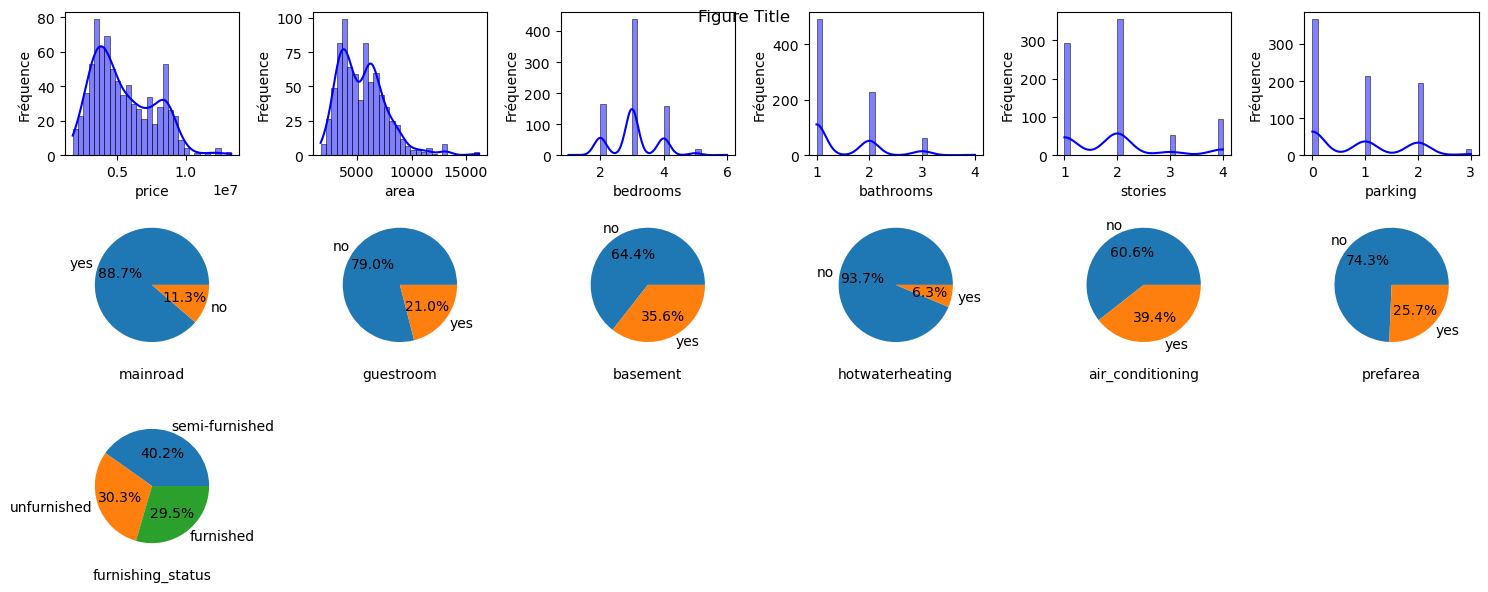

In [14]:
 etude_univarie(df)

### 1.3.2 Etude multivariée

In [50]:
def etude_multivarie(data):
    """ 
    ...
    ...
    """
    colonne_quanti = data.select_dtypes("float").columns
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))
    axes_flat = axes.flatten()
    # Parcourez chaque colonne quantitative et affichez son relation avec le prix 
    for i, col in enumerate(colonne_quanti):
        if col != 'price':
            if col == 'area':
                sns.regplot(x=col, y='price', data=df, line_kws={"color": 'red'}, ax=axes_flat[i-1])
                axes_flat[i-1].set_xlabel(col)
                axes_flat[i-1].set_ylabel('Price')
            else:    
                sns.histplot(x=col, y='price', data=df, line_kws={"color": 'red'}, ax=axes_flat[i-1], cmap='coolwarm',cbar=True)
                axes_flat[i-1].set_xlabel(col)
                axes_flat[i-1].set_ylabel('Price')
            
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax = axes_flat[5])   

    colonne_quali = data.select_dtypes('object').columns
    for i, col in enumerate(colonne_quali):
        sns.histplot(x=col, y='price', data=df, line_kws={"color": 'red'}, ax=axes_flat[5+i], cmap='coolwarm',cbar=True)
        axes_flat[5+i].set_xlabel(col)
        axes_flat[5+i].set_ylabel('Price')     
    
    
    plt.tight_layout()
    # Affichez la figure
    plt.show()

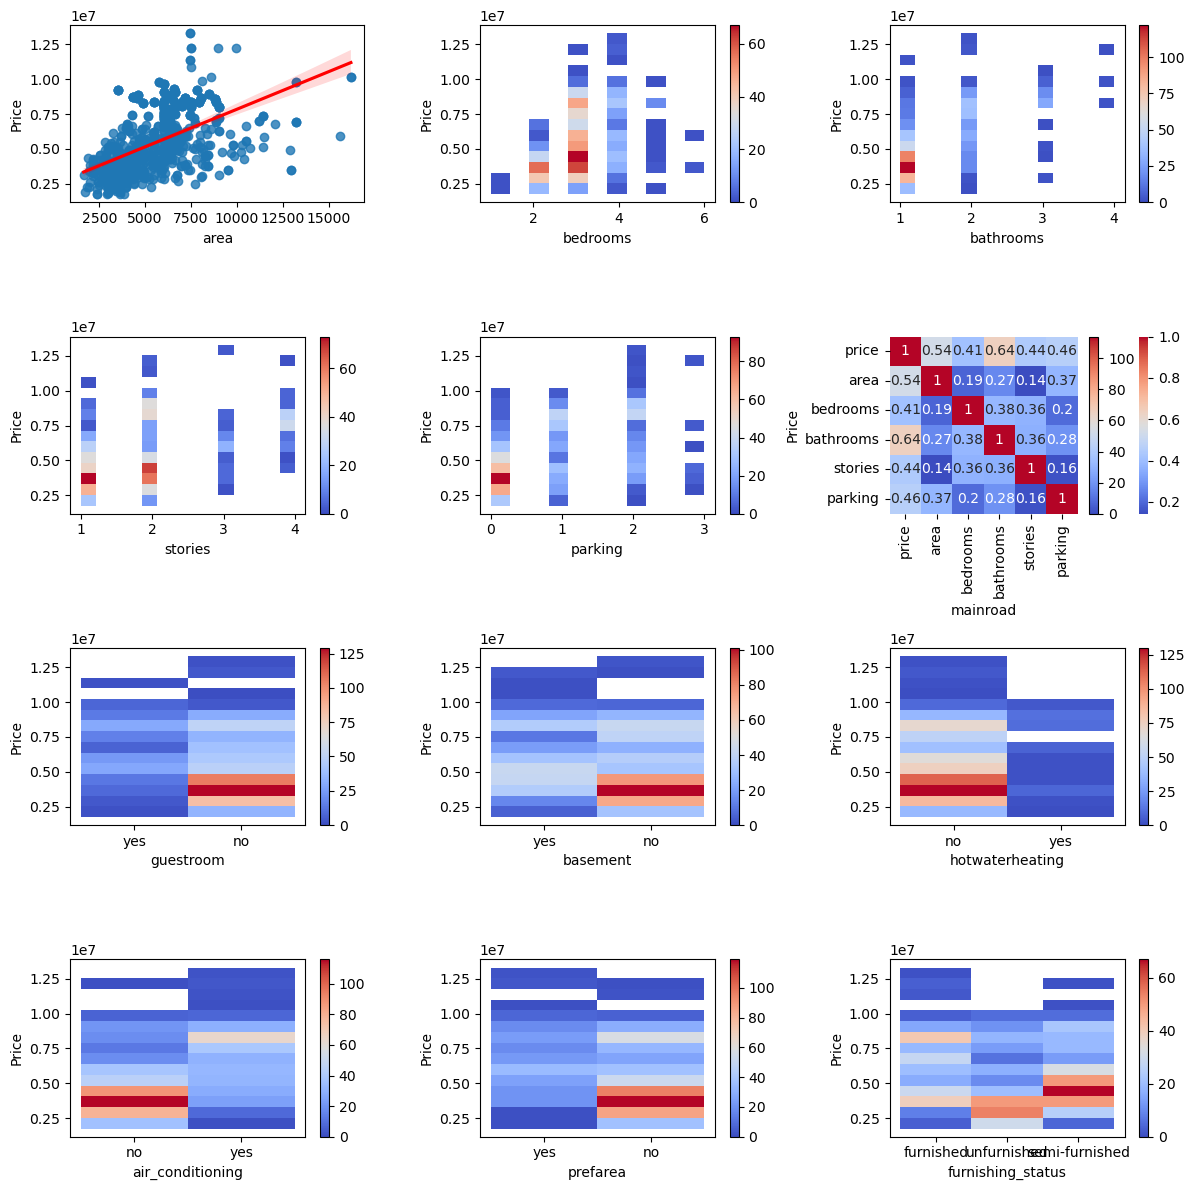

In [51]:
etude_multivarie(df)


### 1.4 Typage des variables

In [17]:
def typage_variable(data):
    """
    ...
    """
    # On cree un variable qui contient le nom des colonnes de type object
    object_columns = data.select_dtypes(include=['object']).columns
    
    # On change les valeurs 'yes' et 'no' dans notre data à 1 et 0 respectivement,
    for col in object_columns:
        data[col] = data[col].replace({'yes' : 1, 'no' : 0, 'semi-furnished' : 'semi_furnished' })
    
    # On fait one hot encoding the the variable furnishing_status
    data = pd.get_dummies(data, columns=['furnishing_status'])
    
    return data

# 2 Validation croisée

# 3 Machine learning

## 3.1 Baseline

## 3.2 Modèle de régression linéaire

## 3.3 Modèle ensembliste

## 3.4 Features importances

# 4 Bonus